<a href="https://colab.research.google.com/github/BlueHat358/Final-Project/blob/master/Submission_ML_Scrissors_Rock_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kurniawan Dwi Waestaputra

kurniawan.1896@students.amikom.ac.id

bluehat358.my.id

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-21 17:12:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.87MB/s    in 53s     

2020-10-21 17:13:14 (5.82 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile
 
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
!pip install split-folders

import splitfolders

dir_base = '/tmp/rockpaperscissors/rps-cv-images'
dir_output = '/tmp/rockpaperscissors/output'

splitfolders.ratio(dir_base, output=dir_output, seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3049.48 files/s]


In [ ]:
import os

paper_val_count = os.listdir(os.path.join(dir_output, 'val/paper'))
rock_val_count = os.listdir(os.path.join(dir_output, 'val/rock'))
scissors_val_count = os.listdir(os.path.join(dir_output, 'val/scissors'))
print(len(paper_val_count + rock_val_count + scissors_val_count))

876


In [ ]:
train_dir = os.path.join(dir_output, 'train')
val_dir = os.path.join(dir_output, 'val')

In [ ]:
paper_train_dir = os.path.join(train_dir, 'paper')
rock_train_dir = os.path.join(train_dir, 'rock')
scissors_train_dir = os.path.join(train_dir, 'scissors')

paper_val_dir = os.path.join(val_dir, 'paper')
rock_val_dir = os.path.join(val_dir, 'rock')
scissors_val_dir = os.path.join(val_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=.2,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss=tf.losses.categorical_crossentropy,
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch=35,
    epochs=20,
    validation_data=val_generator,
    validation_steps=15,
    verbose=2
)

Epoch 1/20
35/35 - 12s - loss: 1.0936 - accuracy: 0.4133 - val_loss: 0.9727 - val_accuracy: 0.7267
Epoch 2/20
35/35 - 12s - loss: 0.7188 - accuracy: 0.7428 - val_loss: 0.5742 - val_accuracy: 0.7844
Epoch 3/20
35/35 - 11s - loss: 0.4040 - accuracy: 0.8676 - val_loss: 0.3609 - val_accuracy: 0.8667
Epoch 4/20
35/35 - 12s - loss: 0.2961 - accuracy: 0.9012 - val_loss: 0.2618 - val_accuracy: 0.9022
Epoch 5/20
35/35 - 12s - loss: 0.2154 - accuracy: 0.9261 - val_loss: 0.1733 - val_accuracy: 0.9467
Epoch 6/20
35/35 - 12s - loss: 0.1866 - accuracy: 0.9376 - val_loss: 0.2061 - val_accuracy: 0.9356
Epoch 7/20
35/35 - 12s - loss: 0.1837 - accuracy: 0.9357 - val_loss: 0.1964 - val_accuracy: 0.9467
Epoch 8/20
35/35 - 12s - loss: 0.1125 - accuracy: 0.9626 - val_loss: 0.1236 - val_accuracy: 0.9689
Epoch 9/20
35/35 - 12s - loss: 0.1216 - accuracy: 0.9571 - val_loss: 0.1435 - val_accuracy: 0.9444
Epoch 10/20
35/35 - 12s - loss: 0.1142 - accuracy: 0.9607 - val_loss: 0.1046 - val_accuracy: 0.9600
Epoch 11/

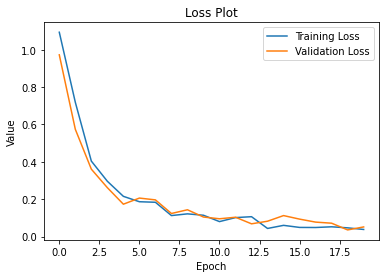

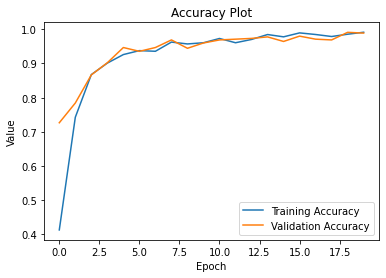

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving IMG_20201022_003420-removebg-preview.jpg to IMG_20201022_003420-removebg-preview.jpg
IMG_20201022_003420-removebg-preview.jpg
[[0. 0. 1.]]
scissors


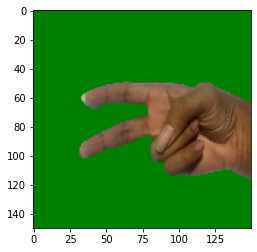

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
upload = files.upload()
 
for fn in upload.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
 
  print(fn)
  print(classes)
 
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')